# **Accessing and Downloading Data**
There are multiple methods of accessing data such as MODIS, VIIRS, Sentinel-2, Landsat-8, and Sentinel-1. Some data are publically available within the GEOAnalytics environment and mounted appropriately. If the data is not mounted as a bucket, it may be available through STAC endpoints within GEOAnalytics. Finally, if the data does not exist in either of those places, using a client to request data over HTTPS may be required.  


## 1. Location of the GEOAnalytics folders

As you can see in the file browser tab, there are 5 folders and multiple files provided as default. There are three different type of folders available in the GEOAnalytics JupyterLab platform:

- **Public Mounted Buckets**: Folders that do not require any access key (publicly available).
    - `gcp-public-data-landsat` - All Landsat data (worldwide; including Landsat 4, 5, 7 and 8) as provided by Google’s public data program. This location is *read-only.*
    - `gcp-public-data-sentinel-2` - All Sentinel-2 data (worldwide) as provided by Google’s public data program. This location is *read-only.*


- **Private Mounted Buckets**: Folders available only if you have GEOAnalytics Platform access. 
    - `geoanalytics_data` - EO data collections (such as sen2cor, VIIRS data) available to all users of GEOAnalytics. This location is *read-only.*
    - `geoanalytics_user_shared_data` - All platform EO data collections including raw datasets and pre-processed datasets. *All users can read and write to this location.*
- **Personal Storage**
    - `geoanalytics_<username>` - A user’s personal network file system where only the logged in user can *read or write* to their own personal storage directory.




## 2. Accessing the Public Data Buckets in JupyterHub
The Landsat and Sentinel-2 Satellite Images are available for free as part of the Google Public Cloud Data program. 

### 2.1 Sentinel-2 Files
As an example, let's take a look into the Sentinel-2 public mounted folder structure (gcp-public-data-sentinel-2 folder):

- `/home/jovyan/` - The home directory for GEOAnalytics Canada.
- `gcp-public-data-sentinel-2/` - Public Mount of the Google Cloud Platform of Sentinel-2 datasets.
- `tiles/` - folder with all the square tiles of approximately 100 kilometers on the Earth's grid surface.
- `UTM_ZONE/` -  A number indicating the longitude zone in the Universal Transverse Mercator (UTM) system.
- `LATITUDE_BAND/` - A letter in the range "C" through "X" (omitting "I" and "O") which indicates the latitude band.
- `GRID_SQUARE/` - A two-letter code indicating the particular 100 km square region.
- `GRANULE_ID/` - The ID of a particular granule, which contains images of this grid square at some point in time.
    - **.SAFE** : Granule images and the metadata are organized according to the product format (Standard Archive Format for Europe) 
- *There are three subdirectories within the granule itself:*
    - `IMG_DATA/` - Contains the actual image data in thirteen JPEG 2000 files (one for each spectral band).
    - `QI_DATA/` - Contains quality control reports for this granule.
    - `AUX_DATA/` Contains ECMWF weather forecast data for this granule.

For our example, the image we want is "T11SLB_20210511T183919_B08.jp2":

- `T11SLB` - The Tile number, from the US Military Grid Reference System (MGRS) naming convention.
- `20210511T183919` - The Acquisition Start date (Year-Month-Day, followed by the time in UTC time zone).
- `B08` - The separate band raster image (In Sentinel 2, Band 8 is the Near Infrared band).
- `.jp2` - The product file format in JPEG2000 format.

In [73]:
sentinel_fp = "/home/jovyan/gcp-public-data-sentinel-2/tiles/11/S/LB/S2B_MSIL1C_20210511T183919_N0300_R070_T11SLB_20210511T210256.SAFE/GRANULE/L1C_T11SLB_A021832_20210511T184632/IMG_DATA/T11SLB_20210511T183919_B08.jp2"


Now, let's use Rasterio to display the JPEG 2000 image of band 8 and see if it works properly. The second parameter, **"driver"**, emphasizes to open a JPEG2000 file using only the JP2OpenJPEG driver. 

(10980, 10980)
[[4433 1984 2788 ... 2994 2892 2768]
 [5140 2726 3532 ... 2951 2801 2766]
 [4347 2850 3861 ... 2917 2754 2749]
 ...
 [2192 2204 2147 ... 2071 2037 2040]
 [2189 2200 2142 ... 1970 1904 1964]
 [2060 2150 2216 ... 1860 1810 1902]]


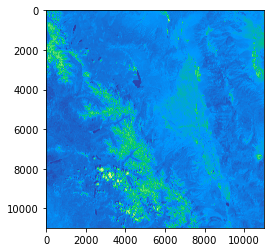

In [78]:
import rasterio
from rasterio.plot import show

# access the driver in 'read' mode
with rasterio.open(sentinel_fp, 'r', driver= 'JP2OpenJPEG') as src:
    b8 = src.read(1)
    print(b8)
    show(b8, cmap='terrain')

### 2.2 Landsat Files
The Google Cloud Platform collection includes the complete USGS archive from Landsat 4, 5, 7, and 8. It covers their full operational lifetimes, with over four million unique scenes over 35 years. Different Landsat satellites have used sensors with different characteristics, so the data is organized by sensor in the following directory structure:

- **LC08** - Landsat 8 TOA Reflectance
- **LE07** - Landsat 7 Enhanced Thematic Mapper Plus (ETM+)
- **LM01** - Landsat 1 Multispectral Scanner System (MSS)
- **LM02** - Landsat 2 Multispectral Scanner System (MSS)
- **LM03** - Landsat 3 Multispectral Scanner System (MSS)
- **LM04** - Landsat 4 Multispectral Scanner System (MSS)
- **LM05** - Landsat 5 Multispectral Scanner System (MSS)
- **LO08** - Landsat 8 OLI Raw Scenes 
- **LT04** - Landsat 4 Thematic Mapper (TM)
- **LT05** - Landsat 5 Thematic Mapper (TM)
- **LT08** - Landsat 8 TIRS Raw Scenes 

The Landsat satellite images are stored in the Cloud-Optimized GeoTIFF file format, with each spectral band stored in a separate file for easy access. The images are organized in the Worldwide Reference System (WRS) grid, which divides the world into 251 orbital paths and 248 rows. 

The components of this path are:

- `SENSOR_ID/`: The satellite and sensor identifier.
- `01/`: Indicates that it is part of Landsat Collection 1.
- `PATH/`: The WRS path number.
- `ROW/`: The WRS row number.
- `SCENE_ID/`: The unique scene ID. (with Acquisition Date)


As an example, here is the naming convention of the file **"LM05_L1TP_011023_19950729_20180315_01_T2_B4.TIF"**:

- `LM05` - The Satellite and Sensor (Landsat 5 MSS)
- `L1TP` - The processing correction level
- `011023` The WRS path followed by the WRS row (Path 11, Row 23)
- `19950729` - The acquisition date (1995-07-29)
- `20180315` - The processing date (2018-03-15)
- `01` - The collection number (Collection 1)
- `T2` - The collection category (Tier 2)
- `B4` - The band of that granule (Band 4)


In [31]:
landsat_fp = "/home/jovyan/gcp-public-data-landsat/LM05/01/011/023/LM05_L1TP_011023_19950729_20180315_01_T2/LM05_L1TP_011023_19950729_20180315_01_T2_B4.TIF"

To plot the raster image, let's use GDAL, a popular library for dealing with GeoTiff images. The `gdal.GA_ReadOnly` argument passed in when opening the file expresses the access desired (GA_ReadOnly or GA_Update).

You can use Rasterio instead to open and read the file. Rasterio is a wrapper around GDALs functionality. 


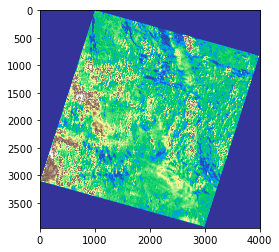

In [79]:
from osgeo import gdal
import matplotlib.pyplot as plt

band = gdal.Open(landsat_fp, gdal.GA_ReadOnly) 
arr = band.ReadAsArray()
plt.imshow(arr, cmap='terrain')
del band # closing the band

## 3. Downloading Data that is not Available in GEOAnalytics
The GEOAnalytics Canada Platform has a wide range of Earth Observation data available from the satellites MODIS, VIIRS, Sentinel-1, Sentinel-2, and Landsat-8. However, you may require data from external sources for your projects if they are not available on our platform. 

We encourage you to import and make use of packages and softwares within your GEOAnalytics environment. 
 
Let's take a look at a few Python Packages you can use to access data. First, run the cell below which installs the packages SentinelHub and NASA's Python CMR.

In [ ]:
! pip install -r data/requirements_1.txt

### 3.1 SentinelHub
The SentinelHub Python package lets users make Open Geospatial Consortium (OGC) web requests to download and process satellite images within Python scripts. Sentinel Hub eliminates the hassle of downloading, archiving and processing petabytes of data and makes the global archive available through web services. Most of the major features are linked to the user's Sentinel Hub account which provide support for:
- Web Map Service (WMS) and Web Coverage Service (WCS) requests.
- Multi-spectra layers and for multi-temporal requests.
- Cloud coverage filtering.
- Different Coordinate Reference Systems.
- Reading and writing downloaded data to disk in the most common image and data formats.

The code block below imports and displays the data collections available in SentinelHub. 

In [37]:
from sentinelhub import DataCollection

# The available data collections
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT45_L1
DataCollection.LANDSAT45_L2
DataCollection.LANDSAT8
DataCollection.LANDSAT8_L1
DataCollection.LANDSAT8_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR


**To create your account and get started with Sentinelhub, take a look at their documentation:
https://sentinelhub-py.readthedocs.io/en/latest/index.html**

### 3.2 NASA CMR

NASA Common Metadata Repository (CMR) is a way to search for remote sensing datasets across many archive centers. The CMR returns download links through the USGS (https://earthexplorer.usgs.gov) to the imagery stored on Google Cloud.


In [64]:
from cmr import CollectionQuery, GranuleQuery
api = CollectionQuery()


In [174]:
collections = api.archive_center("LP DAAC").get(200)

for collection in collections:
    print(collection["short_name"]) # Different versions of the same collection

MOD09GA
MOD09GA
MOD09GQ
MOD09GQ
MYD09GA


In [177]:
api = GranuleQuery()
granules = api.short_name("MOD09GA").point(-112.73, 42.5).get(3)

for granule in granules:
    print(granule["title"])

LANCEMODIS:1316830593
LANCEMODIS:1318106143
LANCEMODIS:1318961142


**Take a look at the documentation: https://cmr.earthdata.nasa.gov/search/**

***Note: You can access any data you download to your personal NFS folder within the Remote Desktops as well!***

## 4. Ground Truth Collection

The GEOAnalytics Canada platform has a ground truth data management system which allows vector ground truth data to be uploaded, viewed, deleted and integrated into other platform services, such as the EO data pre-processing and Jupyter-Lab analytic environments. The Ground Truth data management system is accessible from the main platform dashboard. 

Ground Truth data is organized into collections that originate from uploaded shape files. Clicking on a collection’s “Action” button allows collections to be deleted, or the features to be navigated and explored.

### 4.1 Working with Existing Data

Let's start by exploring existing ground truth data. Navigate to the Ground Truth Collection and click on any features "Action:" button and selecting "Details". The links to the API end points are provided by clicking on “Links”. API endpoints provided by the Ground Truth system implement the Open Geospatial Consortium’s (OGC) API-Features specification allowing for standards compliant libraries and applications to easily access all Ground Truth data. 

The GIF below shows how to access the GeoJSON for the polygons in the **SE_AGR** dataset. 

<img src='../images/real_world_examples_images/01_ground_truth_access.gif'>

Since we have the URL path to this geoJSON, let's plot the polygons within this Jupyter Notebook. First import the neccessary modules and enter your GEOAnalytics Authentication Token. 

In [ ]:
import requests
import yaml

import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

In [ ]:
API_TOKEN = input("Please copy and paste your API Access Token here: ").strip()

Now we will open the geoJSON as a geopandas dataframe, limiting to only the first 10 shapes.

In [3]:
def open_geojson(url):
    headers = {'cookie': API_TOKEN}
    res = requests.get(url, headers=headers, params={'limit':10})
    gdf = gpd.read_file(res.text)
    return gdf

In [4]:
geojson_url = 'https://gt.data.geoanalytics.ca/collections/SE_AGR/items?f=json'
gdf = open_geojson(geojson_url)
gdf

Id Nvx1 Nvx2  Nvx3    id  upload_id  attribute_id upload_name  \
0  1  AGR  FOI  FOI1  1281         28             0      SE_AGR   
1  0  AGR  FOI  FOI1  1282         28             1      SE_AGR   
2  2  AGR  FOI  FOI1  1283         28             2      SE_AGR   
3  3  AGR  FOI  FOI1  1284         28             3      SE_AGR   
4  4  AGR  FOI  FOI1  1285         28             4      SE_AGR   
5  5  AGR  FOI  FOI1  1286         28             5      SE_AGR   
6  6  AGR  FOI  FOI1  1287         28             6      SE_AGR   
7  7  AGR  FOI  FOI1  1288         28             7      SE_AGR   
8  8  AGR  FOI  FOI1  1289         28             8      SE_AGR   
9  9  AGR  FOI  FOI1  1290         28             9      SE_AGR   

                                            geometry  
0  POLYGON ((-73.23565 45.49244, -73.23561 45.492...  
1  POLYGON ((-73.26455 45.47713, -73.26448 45.477...  
2  POLYGON ((-73.14833 45.42648, -73.14280 45.426...  
3  POLYGON ((-73.08542 45.37113, -73.08361 45.369...  
4  POLYGON ((-73.17751 45.22490, -73.17699 45.224...  
5  POLYGON ((-73.65168 45.05087, -73.65084 45.050...  
6  POLYGON ((-73.82663 45.03836, -73.82454 45.038...  
7  POLYGON ((-74.02452 45.20584, -74.02444 45.205...  
8  POLYGON ((-73.90605 45.60349, -73.90519 45.603...  
9  POLYGON ((-73.21586 45.63266, -73.21574 45.632...

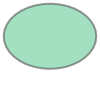

In [5]:
gdf.geometry[0]

We'll use the geographic features from the Cartopy Package and display the polygons from the SE_AGR data overtop. 

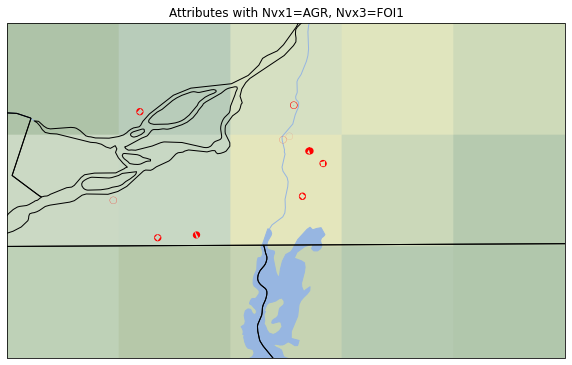

In [148]:
proj = ccrs.epsg(32662)
gdf_epsg = gdf.to_crs(epsg=32662)

fig, ax = plt.subplots(1,1, subplot_kw={'projection': proj}, figsize=(10, 10))
ax.set_extent([-74.5, -72, 46, 44.5], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAKES)#.with_scale('10m'))#, alpha=0.5)
ax.add_feature(cfeature.RIVERS)#.with_scale('10m'), alpha=0.5)
ax.add_feature(cfeature.STATES)#.with_scale('10m'))
ax.add_geometries(gdf_epsg['geometry'], crs=proj, edgecolor='red', linewidth=7)
ax.stock_img()
ax.set_title('Attributes with Nvx1=AGR, Nvx3=FOI1')
fig.show()

### 4.2 Uploading New Data

New shape files can be uploaded to the system by clicking ‘Add Collection’. Then navigate to the Zip file containing the shapefile and upload to the collection. 

<img src='../images/real_world_examples_images/01_ground-truth-upload.gif'>


Now, we will repeat the previous steps, but with our newly uploaded Canada shapefile. 

In [156]:
canada_url = 'https://gt.data.geoanalytics.ca/collections/canada_shp/items?f=json'
canada_gdf = open_geojson(canada_url)
canada_gdf

location    id  upload_id  attribute_id upload_name  \
0   Canada  1764         35             0  canada_shp   

                                            geometry  
0  POLYGON ((-141.12089 69.53452, -128.83087 70.1...

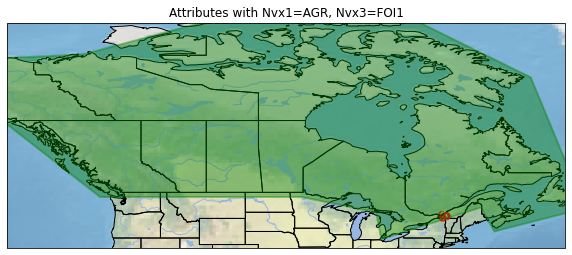

In [161]:
proj = ccrs.epsg(32662)
canada_epsg = canada_gdf.to_crs(epsg=32662)

fig, ax = plt.subplots(1,1, subplot_kw={'projection': proj}, figsize=(10, 10))
ax.set_extent([-140.5, -55, 75, 40.5], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.add_geometries(gdf_epsg['geometry'], crs=proj, edgecolor='red', linewidth=7)
ax.add_geometries(canada_epsg['geometry'], crs=proj, edgecolor='green', facecolor='green', linewidth=2, alpha=0.4)
ax.stock_img()
ax.set_title('Attributes with Nvx1=AGR, Nvx3=FOI1')
fig.show()

***Feel free to experiment with your own datasets!***

## 5. Indexing/accessing data via STAC

In the Introduction to STAC notebook, we looked briefly into what the Spatial Temporal Asset Catalog is and why it is used. In this section we will be working with GEOAnalytics STAC Browser. 

We will query Landsat 8 data over a select date range and save the indices to the STAC. Later, we will experiment and retrieve the data using STAC functionality. 

### 5.1 Query Landsat 8 Indices
Let's use the `gcs_landsat8_stac_indexer` library and query some Landsat 8 data between two dates. We'll index from the existing file containing Landsat paths and rows, and store the resulting dataframe in a new CSV.

**Note:** Data in 2019 has already been added to the STAC server, so try and use another date range. 

In [25]:
import pandas as pd
from gcs_landsat8_stac_indexer2.gcs_landsat8_stac_indexer.query.format import format_landsat_big_query_index
from gcs_landsat8_stac_indexer2.gcs_landsat8_stac_indexer.query.query import execute_big_query_or_get_dataframe

def query_gcs_landsat8_index(path_row_csv_file, 
    start_date, end_date, service_account_json_path, result_csv_path):
    if start_date > end_date:
        raise AssertionError(f'start date {start_date} cannot be greater than end date {end_date}')
    path_row_df = pd.read_csv(path_row_csv_file)
    query_str = format_landsat_big_query_index(path_row_df, start_date=start_date, end_date=end_date)
    df = execute_big_query_or_get_dataframe(query_str, service_account_json_path=service_account_json_path, results_csv_path=result_csv_path)
    return df


In [ ]:
query = query_gcs_landsat8_index('gcs_landsat8_stac_indexer2/data/phac_landsat8_pathrow.csv', 
                                 '2019-1-1', 
                                 '2019-12-31', 
                                 '/home/jovyan/geoanalytics_asaini/geoanalytics-canada-bigquery-sa.json', 
                                 'data/test_2021_09_07.csv')

In [29]:
query

Unnamed: 0               scene_id  \
0               0  LC80010282018347LGN00   
1               1  LC80010172018347LGN00   
2               2  LC80010272018347LGN00   
3               3  LC80010182018347LGN00   
4               4  LC80010182018363LGN00   
...           ...                    ...   
13165       13165  LC80430142018289LGN00   
13166       13166  LC82330182018276LGN00   
13167       13167  LC82330172018292LGN00   
13168       13168  LC82330172018276LGN00   
13169       13169  LC82330182018292LGN00   

                                     product_id spacecraft_id sensor_id  \
0      LC08_L1TP_001028_20181213_20181227_01_T1     LANDSAT_8  OLI_TIRS   
1      LC08_L1TP_001017_20181213_20181227_01_T1     LANDSAT_8  OLI_TIRS   
2      LC08_L1TP_001027_20181213_20181227_01_T1     LANDSAT_8  OLI_TIRS   
3      LC08_L1TP_001018_20181213_20181227_01_T1     LANDSAT_8  OLI_TIRS   
4      LC08_L1TP_001018_20181229_20190130_01_T1     LANDSAT_8  OLI_TIRS   
...                                         ...           ...       ...   
13165  LC08_L1TP_043014_20181016_20181030_01_T1     LANDSAT_8  OLI_TIRS   
13166  LC08_L1TP_233018_20181003_20181010_01_T1     LANDSAT_8  OLI_TIRS   
13167  LC08_L1TP_233017_20181019_20181031_01_T2     LANDSAT_8  OLI_TIRS   
13168  LC08_L1TP_233017_20181003_20181010_01_T1     LANDSAT_8  OLI_TIRS   
13169  LC08_L1TP_233018_20181019_20181031_01_T1     LANDSAT_8  OLI_TIRS   

      date_acquired                      sensing_time  collection_number  \
0        2018-12-13  2018-12-13 14:17:48.048082+00:00                  1   
1        2018-12-13  2018-12-13 14:13:25.356789+00:00                  1   
2        2018-12-13  2018-12-13 14:17:24.161279+00:00                  1   
3        2018-12-13  2018-12-13 14:13:49.235119+00:00                  1   
4        2018-12-29  2018-12-29 14:13:49.848312+00:00                  1   
...             ...                               ...                ...   
13165    2018-10-16  2018-10-16 18:31:47.078931+00:00                  1   
13166    2018-10-03  2018-10-03 14:07:31.865070+00:00                  1   
13167    2018-10-19  2018-10-19 14:07:14.344983+00:00                  1   
13168    2018-10-03  2018-10-03 14:07:07.986739+00:00                  1   
13169    2018-10-19  2018-10-19 14:07:38.227551+00:00                  1   

      collection_category data_type  wrs_path  wrs_row  cloud_cover  \
0                      T1      L1TP         1       28        38.84   
1                      T1      L1TP         1       17        70.83   
2                      T1      L1TP         1       27        70.23   
3                      T1      L1TP         1       18        76.40   
4                      T1      L1TP         1       18        10.58   
...                   ...       ...       ...      ...          ...   
13165                  T1      L1TP        43       14        42.61   
13166                  T1      L1TP       233       18         6.90   
13167                  T2      L1TP       233       17        64.06   
13168                  T1      L1TP       233       17        10.13   
13169                  T1      L1TP       233       18        37.60   

       north_lat  south_lat   west_lon   east_lon  total_size  \
0       47.12503   44.90713  -54.42085  -51.28018   916072324   
1       62.56728   60.34080  -47.36221  -42.57559   726089311   
2       48.53402   46.33515  -53.91857  -50.70199   922557359   
3       61.20192   58.94219  -48.25572  -43.67509   728052231   
4       61.20198   58.94207  -48.26128  -43.68067   803405432   
...          ...        ...        ...        ...         ...   
13165   66.72965   64.38729 -109.38680 -103.63667   901765185   
13166   61.18246   58.96030  -46.62726  -42.09848   851993019   
13167   62.57988   60.32965  -45.73961  -41.01554   941856720   
13168   62.57994   60.32935  -45.72794  -41.00391   882028981   
13169   61.18233   58.95793  -46.63841  -42.11518   959104882   

                              

### 5.2 Save Landsat 8 Indices

Once we have our file with the Landsat 8 Data and it's metadata, we need to add it to the STAC server so it can be used whenever. 

The function to save the Landsat 8 data requires the `gcs_landsat8_stac_indexer` library, the URL to the the geoanalytics STAC browser, https://stac.geoanalytics.ca, your API Token, and the path to the saved CSV file. 

In [ ]:
API_TOKEN = input("Please copy and paste your API Access Token here: ").strip()

In [33]:
import pandas as pd
import requests
from gcs_landsat8_stac_indexer2.gcs_landsat8_stac_indexer.stac.landsat8 import Landsat8StacIndexer
from rasterindexlib.stac.client import StacClient

ERROR_TOLERANCE = 100
NOTIFICATION_INCREMENT = 1000

def save_landsat8_indices_to_stac(stac_url: str, auth_token: str, path_row_csv_file: str, result_csv_path: str):
    path_row_df = pd.read_csv(path_row_csv_file)
    l8_result_df = pd.read_csv(result_csv_path)
    l8_indexer = Landsat8StacIndexer(path_row_df)

    s = requests.Session()
    s.headers.update({'cookie': auth_token})
    stac_client = StacClient(stac_url, session=s)

    error_count = 0
    print(f'begin indexing, {len(l8_result_df)} items found')
    for i, row in l8_result_df.iterrows():
        if (i != 0 and i % NOTIFICATION_INCREMENT == 0):
            print(f'saved {i} items')            
        try:
            _save_row(stac_client, l8_indexer, row)
        except Exception as e:
            error_count += 1
            print(f'Exception #{error_count}: {e} {row}')
        if error_count > ERROR_TOLERANCE:            
            raise RuntimeError('Encountered too many exceptions')

    print('finished')
    
def _save_row(stac_client: StacClient, l8_indexer: Landsat8StacIndexer, row: pd.Series):
    stac_item = l8_indexer.create_landsat8_stac_item(row)
    stac_client.add_item(stac_item.collection_id, stac_item.to_dict())



In [35]:
stac_save = save_landsat8_indices_to_stac('https://stac.geoanalytics.ca',
                                          API_TOKEN,
                                          'gcs_landsat8_stac_indexer2/data/phac_landsat8_pathrow.csv',
                                          'data/test_2021_09_07.csv')

begin indexing, 12989 items found
saved 1000 items
saved 2000 items
!!error occurred https://stac.geoanalytics.ca/collections/landsat-8-l1/items 500
Exception #1: 500 Server Error: Internal Server Error for url: https://stac.geoanalytics.ca/collections/landsat-8-l1/items Unnamed: 0                                                          2372
scene_id                                           LC80090282019070LGN00
product_id                      LC08_L1TP_009028_20190311_20190325_01_T2
spacecraft_id                                                  LANDSAT_8
sensor_id                                                       OLI_TIRS
date_acquired                                                 2019-03-11
sensing_time                            2019-03-11 15:06:59.768351+00:00
collection_number                                                      1
collection_category                                                   T2
data_type                                                           L1T

As you can see from the printed outputs above, every 1000 items sent over are written to the console. 

### 5.3 Accessing the Landsat 8 Data
The next part will experiment with techniques of retrieving the items from STAC.

Since we are requesting data over the Hypertext Transfer Protocol (HTTP), which works as a request-response protocol between a client and server, let's understand two types of methods over HTTP.

- **GET is used to request data from a specified resource (URL).**
    - can be cached.
    - remain in the browser history.
    - have length restrictions.
    - only used to request data and not modify data.
- **POST sends data to a server to create a resource.**
    - never cached
    - do not remain in the browser history
    - have no restrictions on data length
- **PUT is used to update a resource.**


The function below uses the GET search method to collect data in a given collection with specified path and row over the https://stac.geoanalytics.ca/ URL.

In [144]:
def get_query(collection, path, row, limit, auth_token):
    all_data = []
    url_template = 'https://stac.geoanalytics.ca/search?collections={collection}&query={{"landsat:wrs_row":{{"eq":{row}}},"landsat:wrs_path":{{"eq":{path}}}}}&limit={limit}'
    headers={'cookie': auth_token}
    
    url = url_template.format(collection=collection, path=path, row=row, limit=limit)
    r = requests.get(url, headers=headers)
    json_response = r.json()
    for item in json_response['features']:
        all_data.append(item)
            
    df = pd.DataFrame(all_data)
    return df

In [147]:
get_df = get_query('landsat-8-l1', 11, 31, 20, API_TOKEN)
get_df

id  \
0   LC08_L1GT_011031_20191120_20191203_01_T2   
1   LC08_L1TP_011031_20191104_20191115_01_T1   
2   LC08_L1TP_011031_20191019_20191029_01_T1   
3   LC08_L1GT_011031_20191003_20191018_01_T2   
4   LC08_L1TP_011031_20181219_20181227_01_T1   
5   LC08_L1TP_011031_20181203_20181211_01_T1   
6   LC08_L1TP_011031_20180930_20181010_01_T1   
7   LC08_L1TP_011031_20180914_20180928_01_T1   
8   LC08_L1TP_011031_20180829_20180911_01_T1   
9   LC08_L1GT_011031_20180813_20180828_01_T2   
10  LC08_L1GT_011031_20180322_20180403_01_T2   
11  LC08_L1GT_011031_20180306_20180319_01_T2   

                                                 bbox     type  \
0          [-71.21124, 40.66617, -68.34913, 42.82692]  Feature   
1          [-71.22224, 40.66598, -68.36014, 42.82698]  Feature   
2            [-71.22591, 40.66591, -68.36381, 42.827]  Feature   
3          [-71.22224, 40.66598, -68.36014, 42.82698]  Feature   
4           [-71.21124, 40.66617, -68.34546, 42.8269]  Feature   
5          [-71.21857, 40.66604, -68.35647, 42.82696]  Feature   
6          [-71.21124, 40.66617, -68.34913, 42.82692]  Feature   
7   [-71.20391, 40.666309999999996, -68.3381199999...  Feature   
8   [-71.20391, 40.666309999999996, -68.34179, 42....  Feature   
9   [-71.20391, 40.666309999999996, -68.3381199999...  Feature   
10  [-71.22957, 40.66854, -68.36748, 42.8270200000...  Feature   
11           [-71.22591, 40.66591, -68.36381, 42.827]  Feature   

                                                links  \
0   [{'rel': 'collection', 'type': 'application/js...   
1   [{'rel': 'collection', 'type': 'application/js...   
2   [{'rel': 'collection', 'type': 'application/js...   
3   [{'rel': 'collection', 'type': 'application/js...   
4   [{'rel': 'collection', 'type': 'application/js...   
5   [{'rel': 'collection', 'type': 'application/js...   
6   [{'rel': 'collection', 'type': 'application/js...   
7   [{'rel': 'collection', 'type': 'application/js...   
8   [{'rel': 'collection', 'type': 'application/js...   
9   [{'rel': 'collection', 'type': 'application/js...   
10  [{'rel': 'collection', 'type': 'application/js...   
11  [{'rel': 'collection', 'type': 'application/js...   

                                               assets  \
0   {'B1': {'href': 'https://storage.googleapis.co...   
1   {'B1': {'href': 'https://storage.googleapis.co...   
2   {'B1': {'href': 'https://storage.googleapis.co...   
3   {'B1': {'href': 'https://storage.googleapis.co...   
4   {'B1': {'href': 'https://storage.googleapis.co...   
5   {'B1': {'href': 'https://storage.googleapis.co...   
6   {'B1': {'href': 'https://storage.googleapis.co...   
7   {'B1': {'href': 'https://storage.googleapis.co...   
8   {'B1': {'href': 'https://storage.googleapis.co...   
9   {'B1': {'href': 'https://storage.googleapis.co...   
10  {'B1': {'href': 'https://storage.googleapis.co...   
11  {'B1': {'href': 'https://storage.googleapis.co...   

                                             geometry    collection  \
0   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
1   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
2   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
3   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
4   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
5   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
6   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
7   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
8   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
9   {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
10  {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   
11  {'type': 'Polygon', 'coordinates': [[[-71.1341...  landsat-8-l1   

                                           properties  stac_version  \
0   {'datetime': '2019-11-20T15:21:15Z', 'eo:bands...  1.0.0-beta.2   
1   {'da

The returned dataframe contained important values of the data such as the Scene ID, geometry, item properties and the Links to the bands of the images.


Another way to retrieve data is by using the HTTP POST Search method. For this example, let's retrieve all Landsat 8 L1 data within the Canada polygon (used in the previous section), returning the first 100 items. 

In [6]:
import geopandas as gpd
import shapely
import requests
import pandas as pd

gdf = gpd.read_file('/home/jovyan/geoanalytics_asaini/tutorial_notebooks/getting_started/data/canada.shp')
polygon = shapely.geometry.mapping(gdf.geometry[0])
gdf

location                                           geometry
0   Canada  POLYGON ((-141.12089 69.53452, -128.83087 70.1...

In [14]:
polygon

{'type': 'Polygon',
 'coordinates': (((-141.120889, 69.534518),
   (-128.830872, 70.140364),
   (-78.891274, 83.480366),
   (-57.78344, 82.494824),
   (-77.493945, 75.095633),
   (-60.282758, 66.618122),
   (-51.964095, 46.55886),
   (-65.859763, 43.004647),
   (-67.904183, 46.679594),
   (-83.176974, 41.804078),
   (-83.968518, 45.920587),
   (-95.338529, 48.283193),
   (-126.273476, 48.283193),
   (-141.120889, 59.888937),
   (-141.120889, 69.534518)),)}

The POST method uses a dictionary format which is JSON Serializable, where the keys are the parameter names, and the values are the specified description. 

In [17]:
def post_query(collection, polygon, limit, auth_token):
    all_data = []
    url = 'https://stac.geoanalytics.ca/search'
    query = {"collections": [collection],
             "intersects": polygon,
             "limit": limit}
    
    headers={'cookie': auth_token}
    r = requests.post(url, json=query, headers=headers)
    
    json_response = r.json()
    for item in json_response['features']:
        all_data.append(item)
            
    df = pd.DataFrame(all_data, )
    return df

In [20]:
post_df = post_query('landsat-8-l1', polygon, 200, API_TOKEN)
post_df

id  \
0    LC08_L1GT_033027_20191130_20191216_01_T2   
1    LC08_L1GT_033026_20191130_20191216_01_T2   
2    LC08_L1GT_033025_20191130_20191216_01_T2   
3    LC08_L1GT_033024_20191130_20191216_01_T2   
4    LC08_L1GT_033023_20191130_20191216_01_T2   
..                                        ...   
195  LC08_L1TP_032016_20191123_20191203_01_T1   
196  LC08_L1TP_032015_20191123_20191203_01_T1   
197  LC08_L1TP_016030_20191123_20191203_01_T1   
198  LC08_L1TP_016029_20191123_20191203_01_T1   
199  LC08_L1TP_016028_20191123_20191203_01_T1   

                                                  bbox     type  \
0    [-103.41654, 46.304390000000005, -100.11828, 4...  Feature   
1    [-102.88906, 47.729009999999995, -99.52336, 49...  Feature   
2           [-102.33617, 49.15159, -98.89511, 51.3783]  Feature   
3             [-101.75884, 50.5744, -98.2113, 52.7783]  Feature   
4    [-101.14912, 51.991820000000004, -97.486280000...  Feature   
..                                                 ...      ...   
195  [-94.29034, 61.70101, -89.28421999999999, 63.9...  Feature   
196  [-93.22989, 63.05246999999999, -87.97575, 65.3...  Feature   
197  [-78.52939, 42.064890000000005, -75.5467599999...  Feature   
198  [-78.06365, 43.495709999999995, -75.02475, 45....  Feature   
199         [-77.57529, 44.92496, -74.46096, 47.10524]  Feature   

                                                 links  \
0    [{'rel': 'collection', 'type': 'application/js...   
1    [{'rel': 'collection', 'type': 'application/js...   
2    [{'rel': 'collection', 'type': 'application/js...   
3    [{'rel': 'collection', 'type': 'application/js...   
4    [{'rel': 'collection', 'type': 'application/js...   
..                                                 ...   
195  [{'rel': 'collection', 'type': 'application/js...   
196  [{'rel': 'collection', 'type': 'application/js...   
197  [{'rel': 'collection', 'type': 'application/js...   
198  [{'rel': 'collection', 'type': 'application/js...   
199  [{'rel': 'collection', 'type': 'application/js...   

                                                assets  \
0    {'B1': {'href': 'https://storage.googleapis.co...   
1    {'B1': {'href': 'https://storage.googleapis.co...   
2    {'B1': {'href': 'https://storage.googleapis.co...   
3    {'B1': {'href': 'https://storage.googleapis.co...   
4    {'B1': {'href': 'https://storage.googleapis.co...   
..                                                 ...   
195  {'B1': {'href': 'https://storage.googleapis.co...   
196  {'B1': {'href': 'https://storage.googleapis.co...   
197  {'B1': {'href': 'https://storage.googleapis.co...   
198  {'B1': {'href': 'https://storage.googleapis.co...   
199  {'B1': {'href': 'https://storage.googleapis.co...   

                                              geometry    collection  \
0    {'type': 'Polygon', 'coordinates': [[[-103.240...  landsat-8-l1   
1    {'type': 'Polygon', 'coordinates': [[[-102.723...  landsat-8-l1   
2    {'type': 'Polygon', 'coordinates': [[[-102.152...  landsat-8-l1   
3    {'type': 'Polygon', 'coordinates': [[[-101.614...  landsat-8-l1   
4    {'type': 'Polygon', 'coordinates': [[[-99.6658...  landsat-8-l1   
..                                                 ...           ...   
195  {'type': 'Polygon', 'coordinates': [[[-94.1353...  landsat-8-l1   
196  {'type': 'Polygon', 'coordinates': [[[-93.1256...  landsat-8-l1   
197  {'type': 'Polygon', 'coordinates': [[[-78.4132...  landsat-8-l1   
198  {'type': 'Polygon', 'coordinates': [[[-77.9514...  landsat-8-l1   
199  {'type': 'Polygon', 'coordinates': [[[-77.4727...  landsat-8-l1   

                                            properties  stac_version  \
0    {'datetime': '2019-11-30T17:35:37Z', 'eo:bands...  1.0.0-beta.2   
1    {'datetime': '2019-11-30T17:35:13Z', 'eo:bands...  1.0.0-beta.2   
2    {'datetime': '2019-11-30T17:34:49Z', 'eo:bands...  1.0.0-beta.2   
3    {'datetime': '2019-11-30T17:34:26Z', 'eo:bands...  1.0.0-beta.2   
4    {'datetime': '2019-11-30T

Now, here are two additional functions to format the input dataframe and return a dataframe with only the product ID, image creation date, and the URL to the desired bands of the image.

In [21]:
def format_dataframe(pids, assets, bands_to_use):
    dates = [pd.to_datetime(x.split('_')[3]) for x in pids]
    df = pd.DataFrame(dict(product_id=pids, date=dates))
    bands = []
    for band in bands_to_use:
        band_links = []
        for asset in assets:
             band_links.append(asset[band]['href'])
        df[band]=band_links
        
    return df

def format_dataframe_T1(df, bands_to_use):
    T1 = []
    for index, row in df.iterrows():
        if row['id'].endswith('_T1'):
            T1.append(row)
    
    df_T1 = pd.DataFrame(T1)
    pids = df_T1.id.tolist()
    return format_dataframe(pids, df_T1.assets, bands_to_use)

In [25]:
try:
    assert len(post_df) > 0
    rgb_df = format_dataframe_T1(post_df, ['B2','B3','B4'])
except AssertionError:
    print('OAuth token is invalid. Update it in create_dataframe()')

rgb_df.head()

product_id       date  \
0  LC08_L1TP_033021_20191130_20191216_01_T1 2019-11-30   
1  LC08_L1TP_033020_20191130_20191216_01_T1 2019-11-30   
2  LC08_L1TP_017030_20191130_20191216_01_T1 2019-11-30   
3  LC08_L1TP_017029_20191130_20191216_01_T1 2019-11-30   
4  LC08_L1TP_017028_20191130_20191216_01_T1 2019-11-30   

                                                  B2  \
0  https://storage.googleapis.com/gcp-public-data...   
1  https://storage.googleapis.com/gcp-public-data...   
2  https://storage.googleapis.com/gcp-public-data...   
3  https://storage.googleapis.com/gcp-public-data...   
4  https://storage.googleapis.com/gcp-public-data...   

                                                  B3  \
0  https://storage.googleapis.com/gcp-public-data...   
1  https://storage.googleapis.com/gcp-public-data...   
2  https://storage.googleapis.com/gcp-public-data...   
3  https://storage.googleapis.com/gcp-public-data...   
4  https://storage.googleapis.com/gcp-public-data...   

                                                  B4  
0  https://storage.googleapis.com/gcp-public-data...  
1  https://storage.googleapis.com/gcp-public-data...  
2  https://storage.googleapis.com/gcp-public-data...  
3  https://storage.googleapis.com/gcp-public-data...  
4  https://storage.googleapis.com/gcp-public-data...